In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
!apt-get install unzip
!unzip "/content/drive/MyDrive/Project-Road/Project Road.v4i.yolov11.zip" -d /content/drive/MyDrive/Project-Road/
!ls /content/drive/MyDrive/Project-Road/

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Archive:  /content/drive/MyDrive/Project-Road/Project Road.v4i.yolov11.zip
  inflating: /content/drive/MyDrive/Project-Road/README.dataset.txt  
  inflating: /content/drive/MyDrive/Project-Road/README.roboflow.txt  
  inflating: /content/drive/MyDrive/Project-Road/data.yaml  
   creating: /content/drive/MyDrive/Project-Road/test/
   creating: /content/drive/MyDrive/Project-Road/test/images/
 extracting: /content/drive/MyDrive/Project-Road/test/images/1458314-gilgitskarduroadlandslide-1500092394_jpg.rf.6955869d585a399899efca259c49be08.jpg  
 extracting: /content/drive/MyDrive/Project-Road/test/images/20190615-105637-largejpg_jpg.rf.a0ca7a2095583da009cb13cda18cd068.jpg  
 extracting: /content/drive/MyDrive/Project-Road/test/images/2992871-1796416375_jpg.rf.e88e2ee916dbf096865

In [15]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 15.6 MB/s eta 0:00:00


In [16]:
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [17]:
model = YOLO('yolov8s.pt')  # Pre-trained small model


100%|██████████| 21.5M/21.5M [00:00<00:00, 160MB/s]


In [18]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/Project-Road/data.yaml epochs=50 batch=16 imgsz=224 lr0=0.01 lrf=0.1 patience=20 plots=True

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Project-Road/data.yaml, epochs=50, time=None, patience=20, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

In [19]:
!ls /content/runs/detect/train

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1731167697.a53f05420c32.3256.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch600.jpg	weights
P_curve.png					    train_batch601.jpg
PR_curve.png					    train_batch602.jpg


In [20]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/content/drive/MyDrive/Project-Road/data.yaml


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Project-Road/valid/labels.cache... 67 images, 0 backgrounds, 0 corrupt: 100% 67/67 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:14<00:00,  2.93s/it]
                   all         67         67      0.141      0.364      0.279     0.0747
            Landslides         16         16      0.243      0.312      0.191     0.0403
             Left-Turn         16         16      0.128      0.562      0.312     0.0843
                 Other          3          3          0          0      0.233     0.0521
            Right-Turn         17         17      0.115      0.412      0.202     0.0577
         Straight-Road         15         15       0.22      0.533      0.459      0.139
Speed: 1.9ms preprocess, 182.2ms inference,

In [21]:
!ls runs/detect/val

confusion_matrix_normalized.png  P_curve.png   val_batch0_labels.jpg  val_batch1_pred.jpg
confusion_matrix.png		 PR_curve.png  val_batch0_pred.jpg    val_batch2_labels.jpg
F1_curve.png			 R_curve.png   val_batch1_labels.jpg  val_batch2_pred.jpg


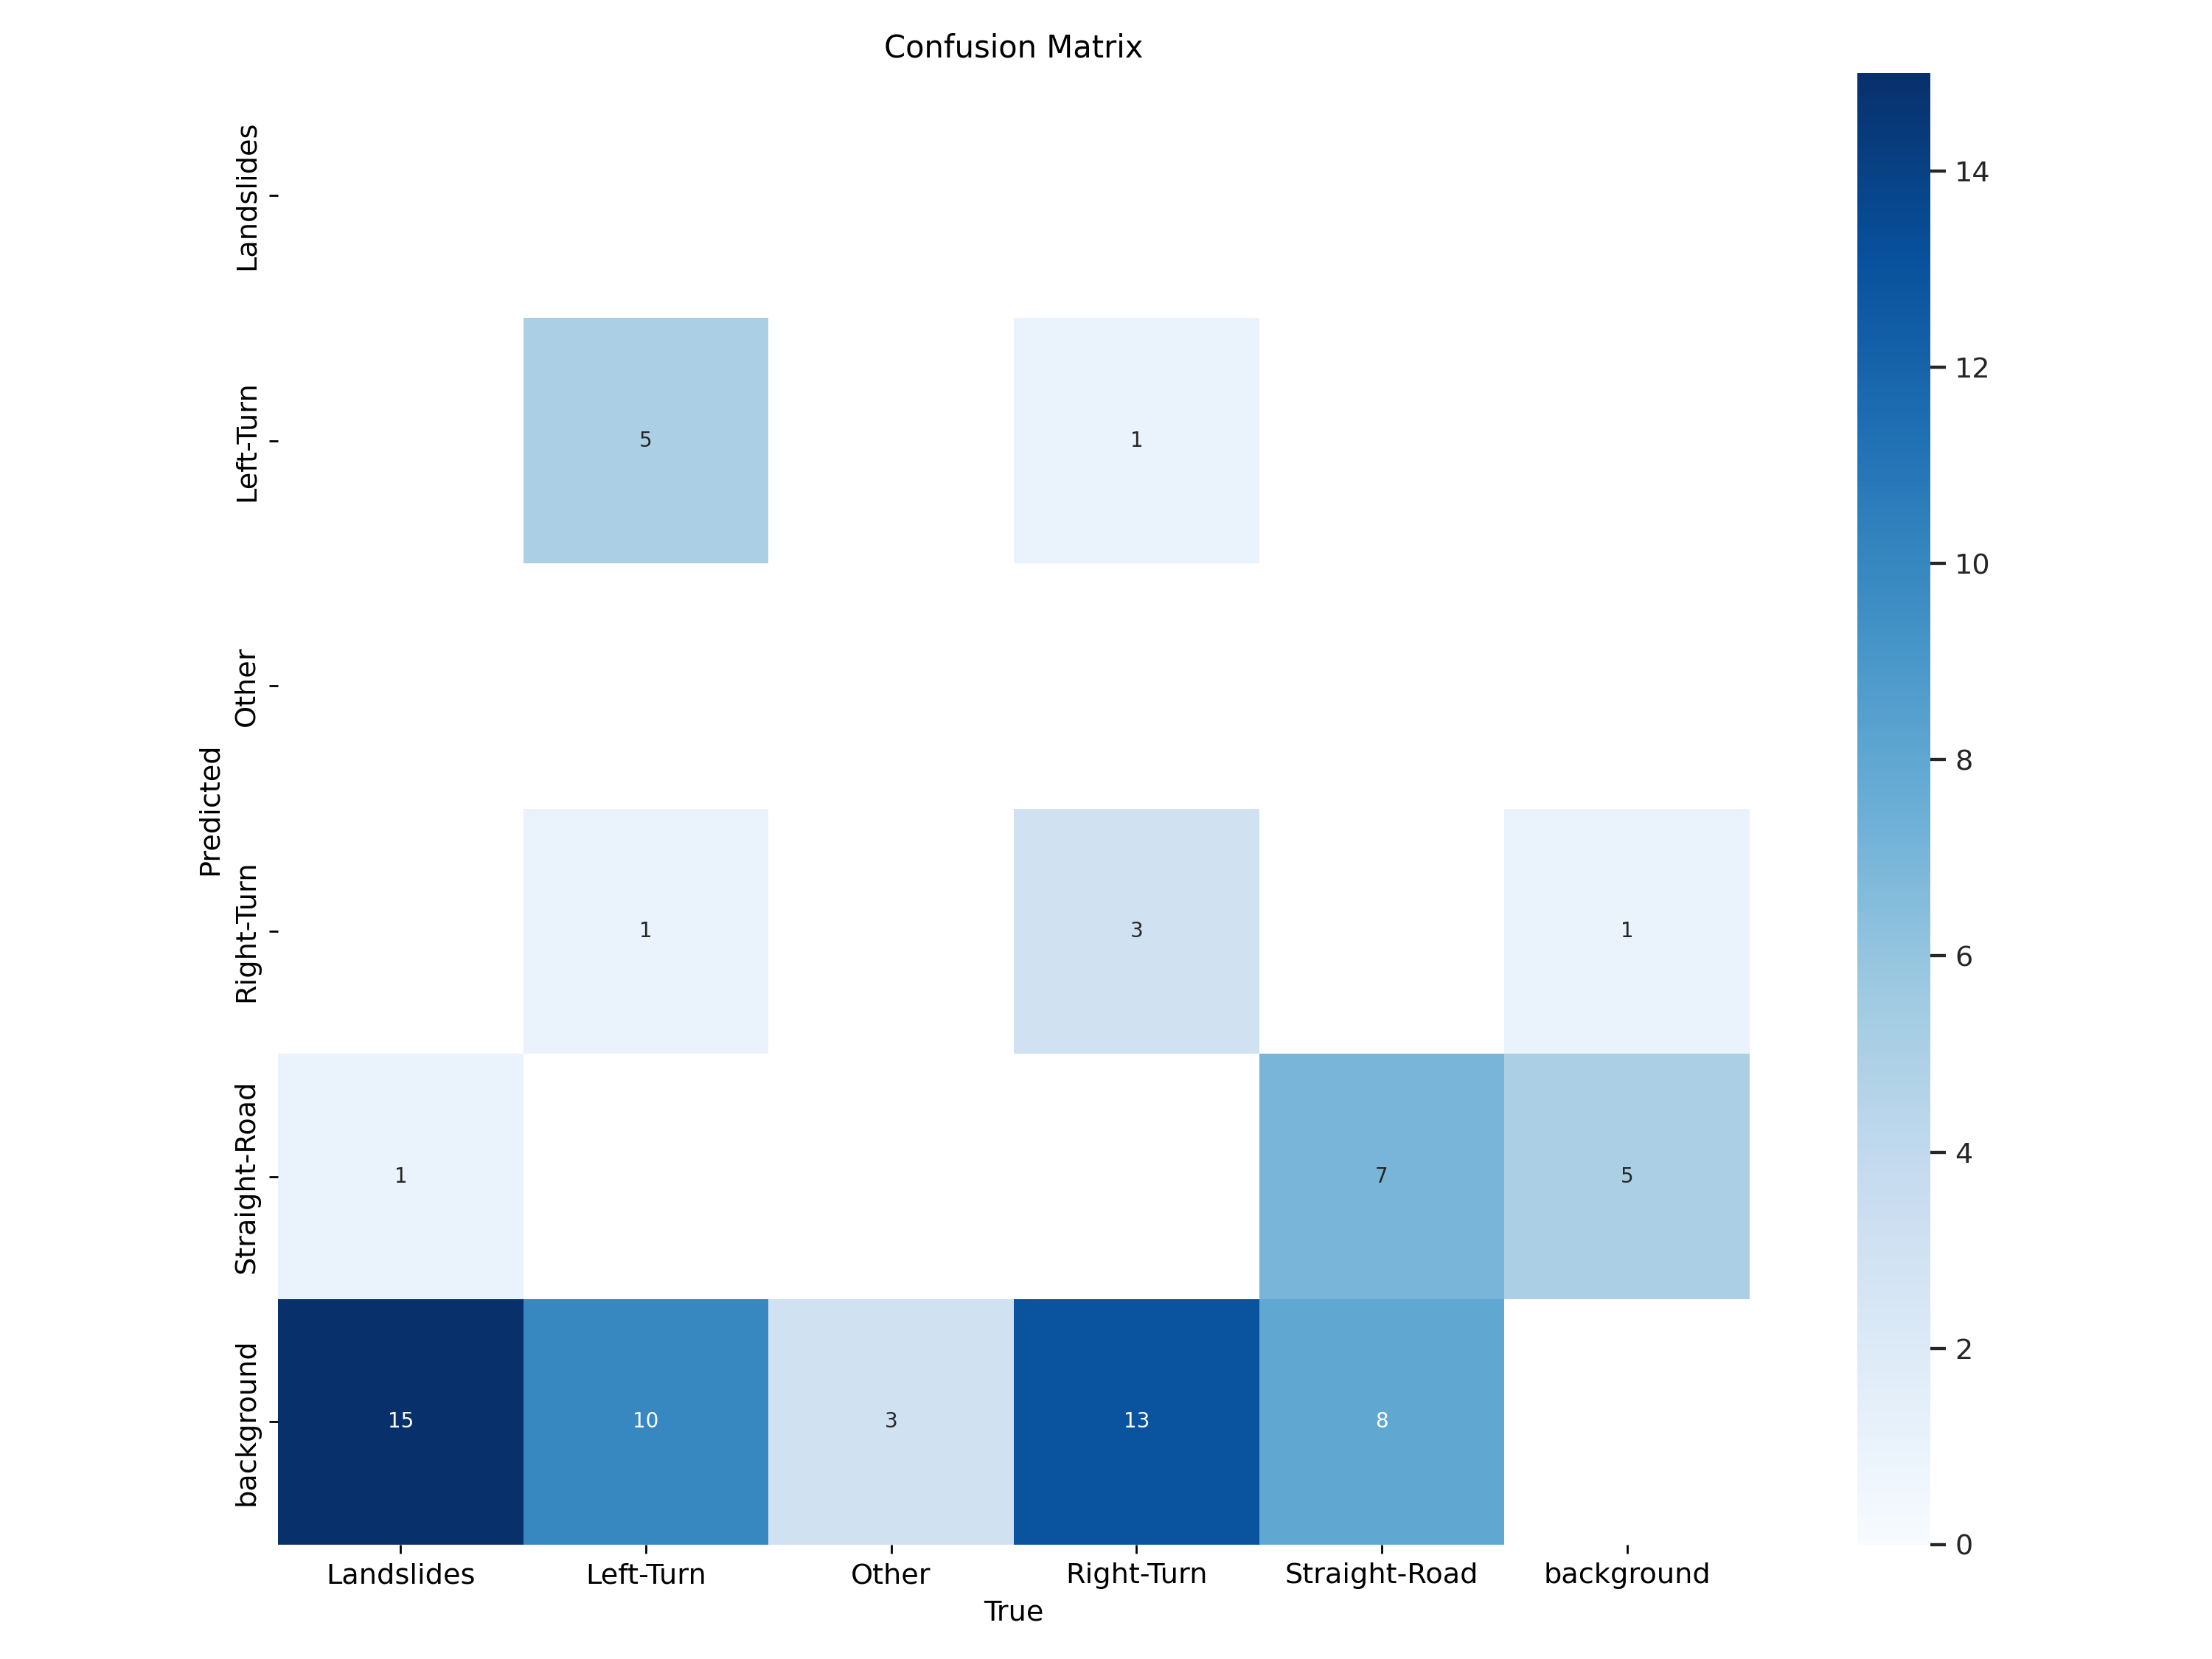

In [22]:
from IPython.display import Image, display

# Path to the confusion matrix image from the latest run
confusion_matrix_path = 'runs/detect/train/confusion_matrix.png'  # Update this path if needed

# Display the confusion matrix image
display(Image(filename=confusion_matrix_path, width=600))


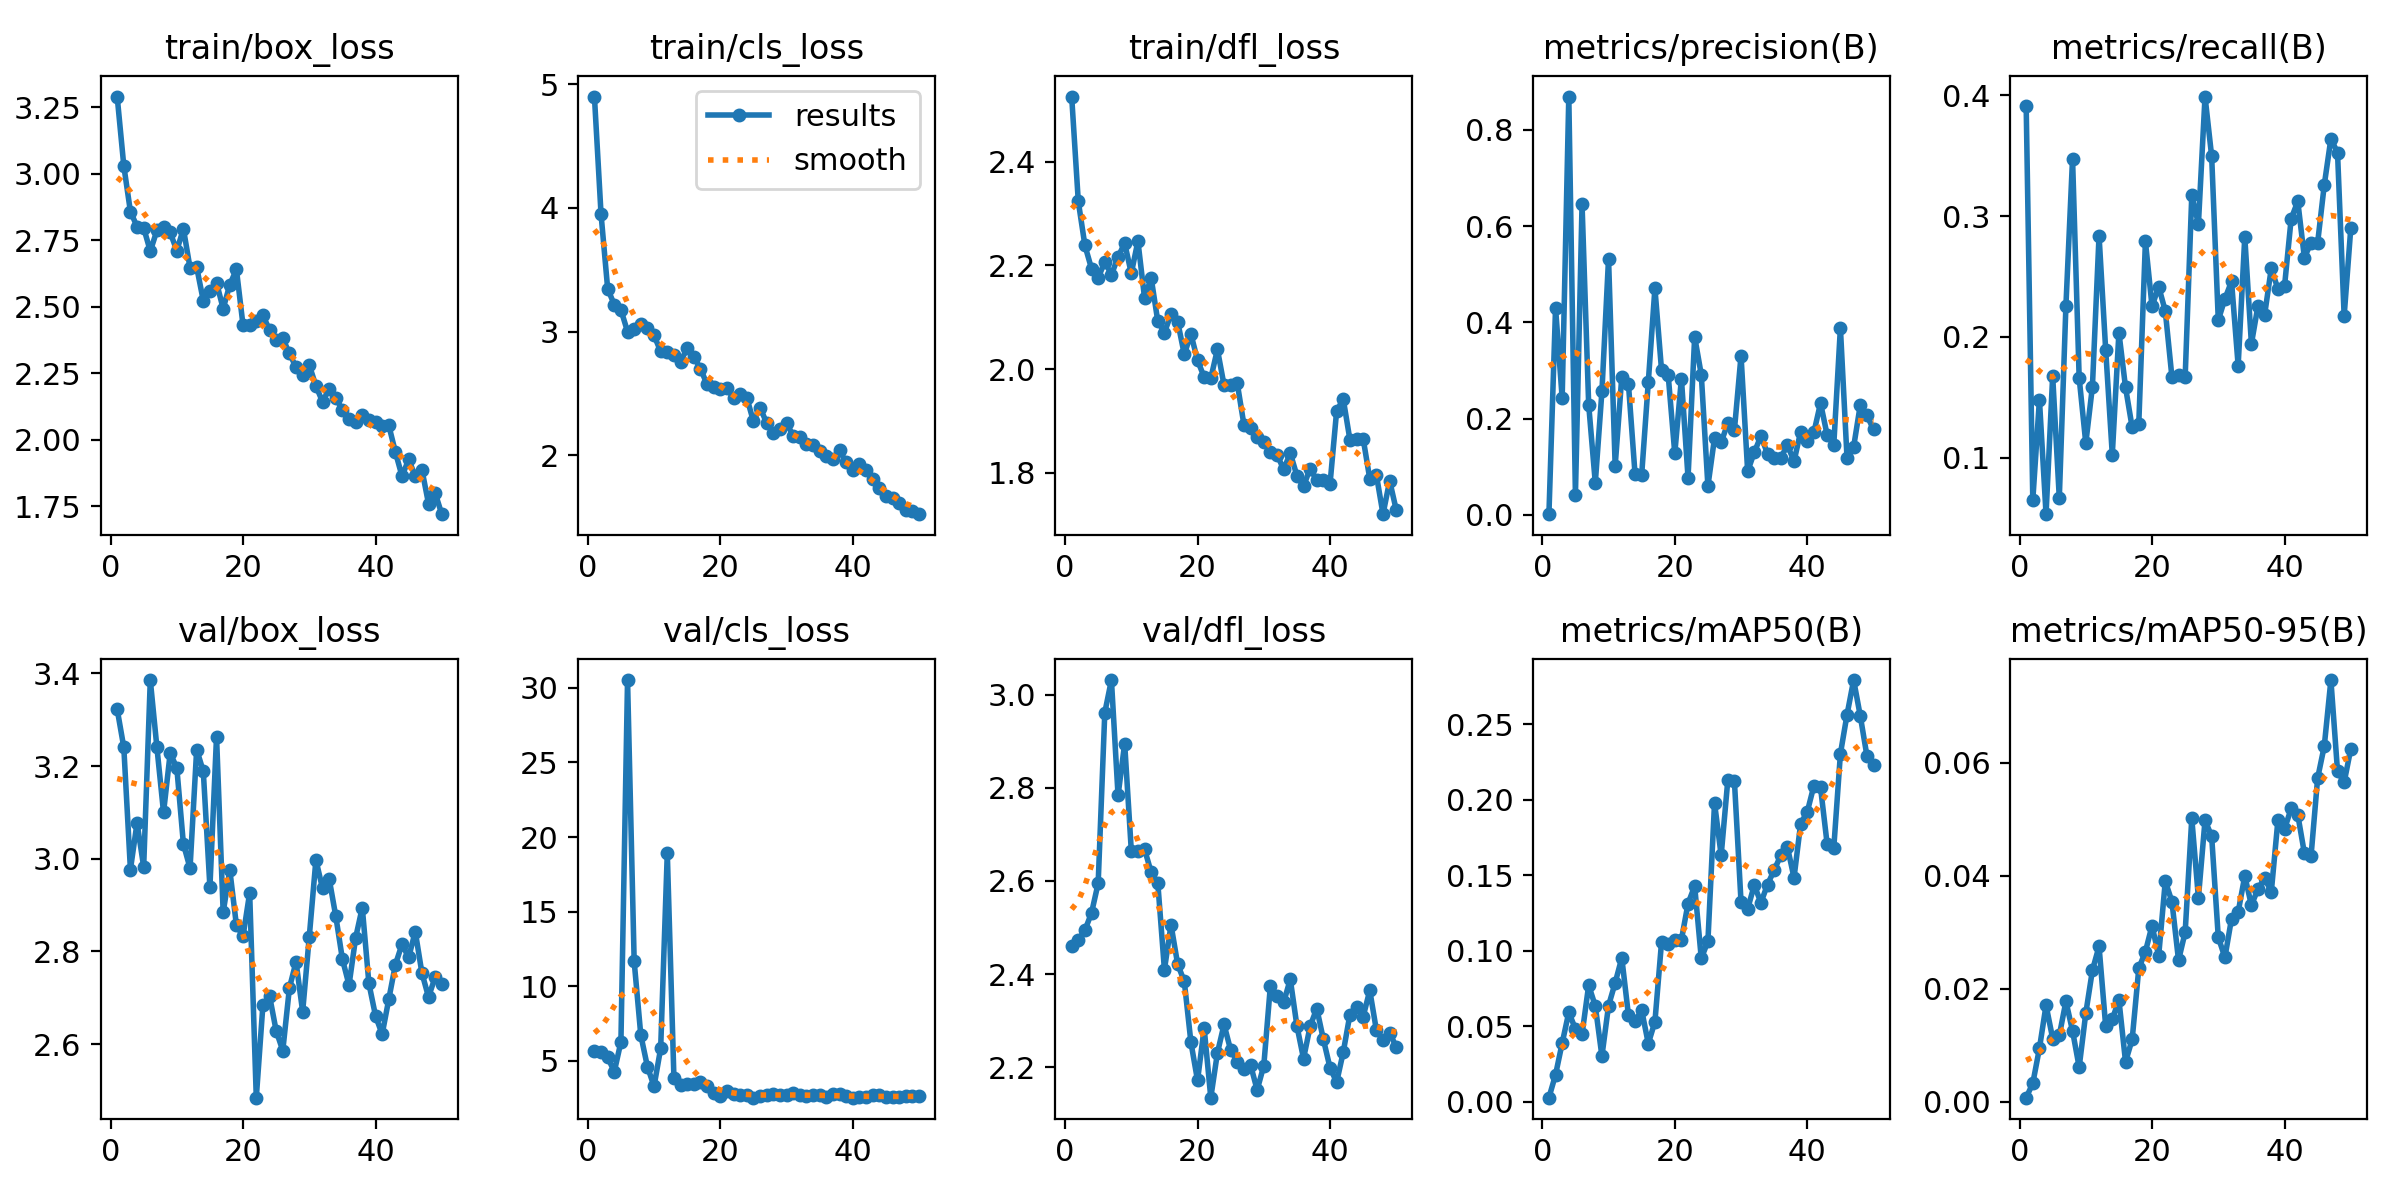

In [23]:
Image(filename='runs/detect/train/results.png', width=600)

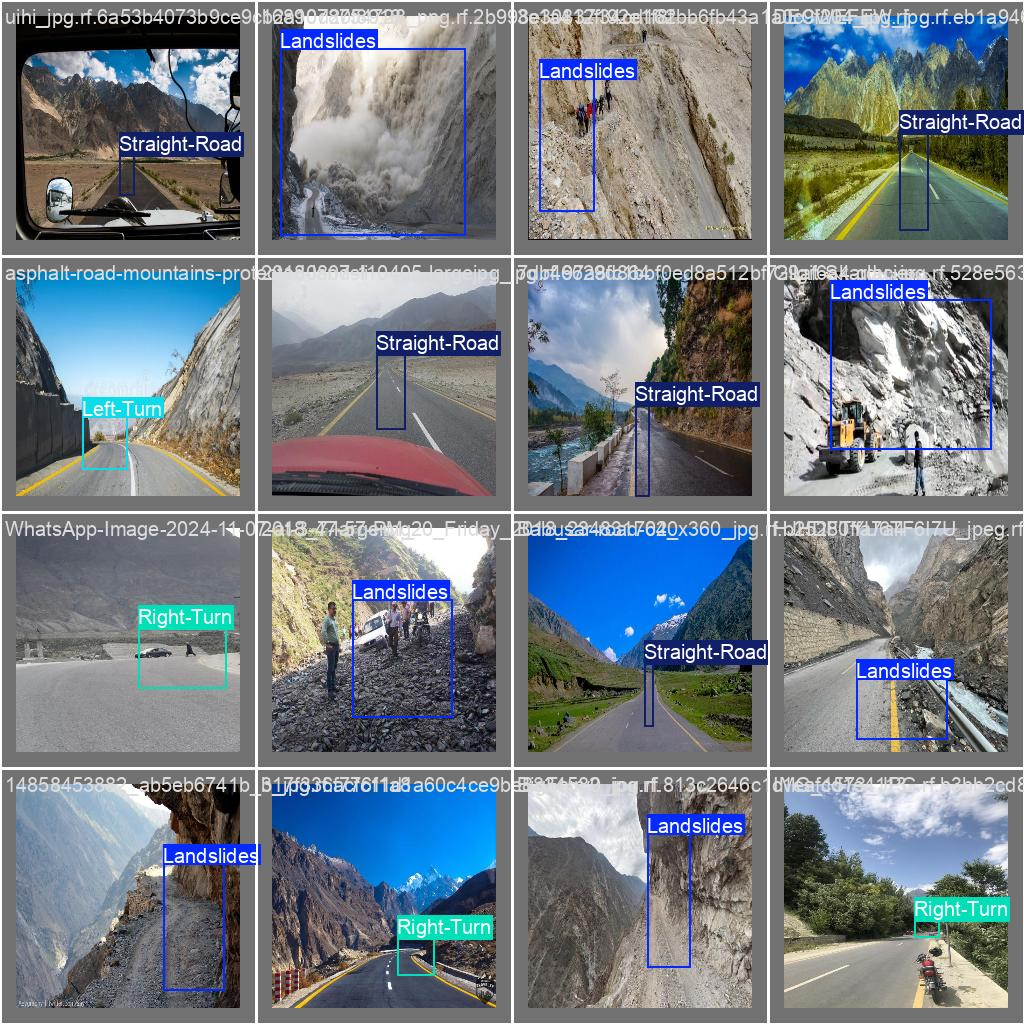

In [24]:
Image(filename='/content/runs/detect/train/val_batch1_labels.jpg', width=600)